In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
#enable inline plotting
%matplotlib inline
import numpy as np
import requests
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from time import sleep

#API and date range
api_url = 'https://data.ny.gov/resource/wujg-7c2s.json'
limit = 50000
start_date = datetime(2020, 7, 1)
end_date = datetime(2024, 12, 31)

#Container for all raw data
all_data = []

#Loop through each month
current = start_date
while current <= end_date:
    start_str = current.strftime('%Y-%m-%dT00:00:00')
    end_str = (current + relativedelta(months=1) - timedelta(days=1)).strftime('%Y-%m-%dT23:59:59')
    where_clause = f"transit_timestamp between '{start_str}' and '{end_str}'"

    params = {
        '$limit': limit,
        '$where': where_clause
    }

    try:
        response = requests.get(api_url, params=params)
        response.raise_for_status()
        chunk = response.json()

        if chunk:
            all_data.extend(chunk)
            print(f" {current.strftime('%Y-%m')} — {len(chunk)} records")
        else:
            print(f"{current.strftime('%Y-%m')} — No data")

    except Exception as e:
        print(f"Error on {current.strftime('%Y-%m')}: {e}")

    current += relativedelta(months=1)
    sleep(1)  # Avoid throttling

#Convert to DataFrame
df = pd.DataFrame(all_data)
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='coerce')
df['ridership'] = pd.to_numeric(df['ridership'], errors='coerce')

print(f"\n Finished fetching data — Total rows: {df.shape[0]}")
display(df.head())

 2020-07 — 50000 records
 2020-08 — 50000 records
 2020-09 — 50000 records
 2020-10 — 50000 records
 2020-11 — 50000 records
 2020-12 — 50000 records
 2021-01 — 50000 records
 2021-02 — 50000 records
 2021-03 — 50000 records
 2021-04 — 50000 records
 2021-05 — 50000 records
 2021-06 — 50000 records
 2021-07 — 50000 records
 2021-08 — 50000 records
 2021-09 — 50000 records
 2021-10 — 50000 records
 2021-11 — 50000 records
 2021-12 — 50000 records
 2022-01 — 50000 records
 2022-02 — 50000 records
 2022-03 — 50000 records
 2022-04 — 50000 records
 2022-05 — 50000 records
 2022-06 — 50000 records
 2022-07 — 50000 records
 2022-08 — 50000 records
 2022-09 — 50000 records
 2022-10 — 50000 records
 2022-11 — 50000 records
 2022-12 — 50000 records
 2023-01 — 50000 records
 2023-02 — 50000 records
 2023-03 — 50000 records
 2023-04 — 50000 records
 2023-05 — 50000 records
 2023-06 — 50000 records
 2023-07 — 50000 records
 2023-08 — 50000 records
 2023-09 — 50000 records
 2023-10 — 50000 records


,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference
0,2020-07-01,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.63997,-73.94841,"{'type': 'Point', 'coordinates': [-73.94841, 4..."
1,2020-07-01,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923,"{'type': 'Point', 'coordinates': [-73.89923, 4..."
2,2020-07-01,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381,"{'type': 'Point', 'coordinates': [-73.78381, 4..."
3,2020-07-01,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085,"{'type': 'Point', 'coordinates': [-73.95085, 4..."
4,2020-07-01,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948,"{'type': 'Point', 'coordinates': [-73.89948, 4..."


In [3]:
#save data from the api request into a csv file
df.to_csv('nyc_ridership_raw.csv', index=False)

In [4]:
#read the csv file for further data manipulation
df_data=pd.read_csv('nyc_ridership_raw.csv')
#display(df_data) #check output

In [5]:
#create a copy of the original dataframe to work on
#to preserve the original just in case
df2=df_data.copy()
#display the data
display(df2.head(20))

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference
0,2020-07-01 00:00:00,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.639970,-73.94841,"{'type': 'Point', 'coordinates': [-73.94841, 4..."
1,2020-07-01 00:00:00,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923,"{'type': 'Point', 'coordinates': [-73.89923, 4..."
2,2020-07-01 00:00:00,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381,"{'type': 'Point', 'coordinates': [-73.78381, 4..."
3,2020-07-01 00:00:00,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085,"{'type': 'Point', 'coordinates': [-73.95085, 4..."
4,2020-07-01 00:00:00,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948,"{'type': 'Point', 'coordinates': [-73.89948, 4..."
5,2020-07-01 00:00:00,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,2.0,0.0,40.658733,-73.89923,"{'type': 'Point', 'coordinates': [-73.89923, 4..."
6,2020-07-01 00:00:00,subway,246,Avenue I (F),Brooklyn,metrocard,Metrocard - Full Fare,3.0,0.0,40.625320,-73.97613,"{'type': 'Point', 'coordinates': [-73.97613, 4..."
7,2020-07-01 00:00:00,subway,45,Beverley Rd (Q),Brooklyn,metrocard,Metrocard - Full Fare,2.0,0.0,40.644030,-73.96449,"{'type': 'Point', 'coordinates': [-73.96449, 4..."
8,2020-07-01 00:00:00,subway,138,Canarsie-Rockaway Pkwy (L),Brooklyn,metrocard,Metrocard - Other,1.0,0.0,40.646652,-73.90185,"{'type': 'Point', 'coordinates': [-73.90185, 4..."
9,2020-07-01 00:00:00,subway,352,New Lots Av (3),Brooklyn,metrocard,Metrocard - Other,7.0,0.0,40.666237,-73.88408,"{'type': 'Point', 'coordinates': [-73.88408, 4..."


In [6]:
df2.isnull().sum() #make sure there are no null values

,0
transit_timestamp,0
transit_mode,0
station_complex_id,0
station_complex,0
borough,0
payment_method,0
fare_class_category,0
ridership,0
transfers,0
latitude,0


In [7]:
#drop unnecessary columns
df2.drop(['georeference'], axis=1, inplace=True)
#print(df2)
#df.rename(columns={'state':'registration_state'}, inplace=True) #rename ambiguous columns
df2.dropna(inplace=True) #drop rows with null values
display(df2)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude
0,2020-07-01 00:00:00,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.639970,-73.94841
1,2020-07-01 00:00:00,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923
2,2020-07-01 00:00:00,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381
3,2020-07-01 00:00:00,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085
4,2020-07-01 00:00:00,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948
...,...,...,...,...,...,...,...,...,...,...,...
2699995,2024-12-01 16:00:00,subway,46,Cortelyou Rd (Q),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,6.0,0.0,40.640926,-73.96389
2699996,2024-12-01 16:00:00,subway,460,33 St-Rawson St (7),Queens,metrocard,Metrocard - Fair Fare,7.0,1.0,40.744587,-73.93100
2699997,2024-12-01 16:00:00,subway,460,33 St-Rawson St (7),Queens,omny,OMNY - Seniors & Disability,1.0,0.0,40.744587,-73.93100
2699998,2024-12-01 16:00:00,subway,461,"Queensboro Plaza (7,N,W)",Queens,metrocard,Metrocard - Unlimited 7-Day,34.0,0.0,40.750584,-73.94020


In [8]:
null_summary = df2.isna().sum()
print(null_summary)

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
dtype: int64


In [9]:
#customize palette and style
sns.set_style('darkgrid')
sns.set_palette("Set2")

In [10]:
print(df2.dtypes)

transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership              float64
transfers              float64
latitude               float64
longitude              float64
dtype: object


In [11]:
df2['transit_timestamp'] = pd.to_datetime(df2['transit_timestamp'], errors='coerce')

In [12]:
df2['ridership'] = pd.to_numeric(df2['ridership'], errors='coerce')
df2['transfers'] = pd.to_numeric(df2['transfers'], errors='coerce')
df2['latitude'] = pd.to_numeric(df2['latitude'], errors='coerce')
df2['longitude'] = pd.to_numeric(df2['longitude'], errors='coerce')

In [13]:
for col in ['transit_mode', 'borough', 'payment_method', 'fare_class_category']:
    df2[col] = df2[col].astype('category')

In [14]:
print(df2.dtypes)

transit_timestamp      datetime64[ns]
transit_mode                 category
station_complex_id             object
station_complex                object
borough                      category
payment_method               category
fare_class_category          category
ridership                     float64
transfers                     float64
latitude                      float64
longitude                     float64
dtype: object


In [15]:
df2.head(10)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude
0,2020-07-01,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.639970,-73.94841
1,2020-07-01,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923
2,2020-07-01,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381
3,2020-07-01,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085
4,2020-07-01,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948
5,2020-07-01,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,2.0,0.0,40.658733,-73.89923
6,2020-07-01,subway,246,Avenue I (F),Brooklyn,metrocard,Metrocard - Full Fare,3.0,0.0,40.625320,-73.97613
7,2020-07-01,subway,45,Beverley Rd (Q),Brooklyn,metrocard,Metrocard - Full Fare,2.0,0.0,40.644030,-73.96449
8,2020-07-01,subway,138,Canarsie-Rockaway Pkwy (L),Brooklyn,metrocard,Metrocard - Other,1.0,0.0,40.646652,-73.90185
9,2020-07-01,subway,352,New Lots Av (3),Brooklyn,metrocard,Metrocard - Other,7.0,0.0,40.666237,-73.88408


Total Ridership by Payment Method



In [16]:
# Convert to datetime and extract year
df2['transit_timestamp'] = pd.to_datetime(df2['transit_timestamp'])
df2['year'] = df2['transit_timestamp'].dt.year

# Group by year and payment method
yearly_methods = df2.groupby(['year', 'payment_method'])['ridership'].sum().reset_index()

# Pivot to compare side by side
yearly_pivot = yearly_methods.pivot(index='year', columns='payment_method', values='ridership').fillna(0).astype(int)

# Print table
print("Yearly Ridership by Payment Method:\n")
print(yearly_pivot)

<ipython-input-16-4fa24ccacdb0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_methods = df2.groupby(['year', 'payment_method'])['ridership'].sum().reset_index()


Yearly Ridership by Payment Method:

payment_method  metrocard      omny
year                               
2020              6867230    536500
2021             15709646   3709886
2022             16815262   7907747
2023             14720003  10991900
2024             11124299  12787738


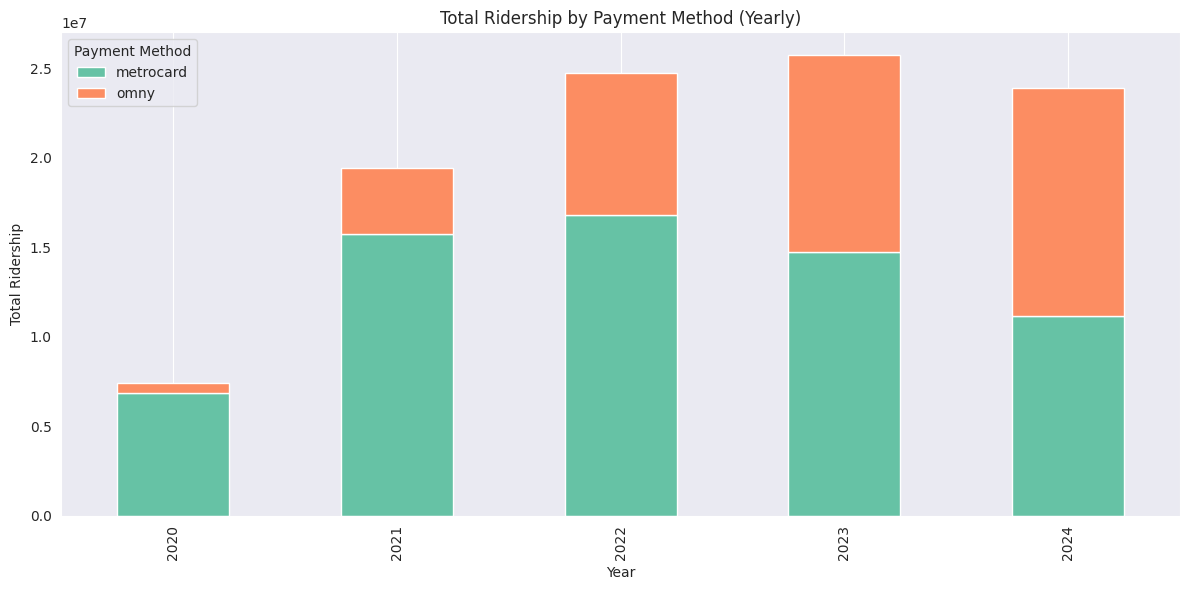

In [17]:
# Plot stacked bar chart
yearly_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Total Ridership by Payment Method (Yearly)")
plt.xlabel("Year")
plt.ylabel("Total Ridership")
plt.legend(title="Payment Method")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [18]:
df2.head(10)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,year
0,2020-07-01,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.639970,-73.94841,2020
1,2020-07-01,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Full Fare,4.0,0.0,40.658733,-73.89923,2020
2,2020-07-01,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Full Fare,1.0,1.0,40.712646,-73.78381,2020
3,2020-07-01,subway,354,"Sterling St (2,5)",Brooklyn,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.662743,-73.95085,2020
4,2020-07-01,subway,137,East 105 St (L),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.650574,-73.89948,2020
5,2020-07-01,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,2.0,0.0,40.658733,-73.89923,2020
6,2020-07-01,subway,246,Avenue I (F),Brooklyn,metrocard,Metrocard - Full Fare,3.0,0.0,40.625320,-73.97613,2020
7,2020-07-01,subway,45,Beverley Rd (Q),Brooklyn,metrocard,Metrocard - Full Fare,2.0,0.0,40.644030,-73.96449,2020
8,2020-07-01,subway,138,Canarsie-Rockaway Pkwy (L),Brooklyn,metrocard,Metrocard - Other,1.0,0.0,40.646652,-73.90185,2020
9,2020-07-01,subway,352,New Lots Av (3),Brooklyn,metrocard,Metrocard - Other,7.0,0.0,40.666237,-73.88408,2020


What is the distribution of fare class categories?

In [19]:
# Group by fare_class_category and payment_method
fare_dist = df2.groupby(['fare_class_category', 'payment_method'])['ridership'].sum().reset_index()

# Examine the aggregated fare distribution
print(fare_dist.head())

     fare_class_category payment_method   ridership
0  Metrocard - Fair Fare      metrocard   3387533.0
1  Metrocard - Fair Fare           omny         0.0
2  Metrocard - Full Fare      metrocard  26211645.0
3  Metrocard - Full Fare           omny         0.0
4      Metrocard - Other      metrocard   4959414.0


<ipython-input-19-4850f700fdb7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_dist = df2.groupby(['fare_class_category', 'payment_method'])['ridership'].sum().reset_index()


In [20]:
fare_dist['percentage'] = fare_dist.groupby('payment_method')['ridership'].transform(lambda x: 100 * x / x.sum())
print(fare_dist)

                 fare_class_category payment_method   ridership  percentage
0              Metrocard - Fair Fare      metrocard   3387533.0    5.192701
1              Metrocard - Fair Fare           omny         0.0    0.000000
2              Metrocard - Full Fare      metrocard  26211645.0   40.179453
3              Metrocard - Full Fare           omny         0.0    0.000000
4                  Metrocard - Other      metrocard   4959414.0    7.602214
5                  Metrocard - Other           omny         0.0    0.000000
6   Metrocard - Seniors & Disability      metrocard   4079119.0    6.252823
7   Metrocard - Seniors & Disability           omny         0.0    0.000000
8               Metrocard - Students      metrocard   3984998.0    6.108546
9               Metrocard - Students           omny         0.0    0.000000
10      Metrocard - Unlimited 30-Day      metrocard  10773530.0   16.514589
11      Metrocard - Unlimited 30-Day           omny         0.0    0.000000
12       Met

<ipython-input-20-ff6bcd63015b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_dist['percentage'] = fare_dist.groupby('payment_method')['ridership'].transform(lambda x: 100 * x / x.sum())


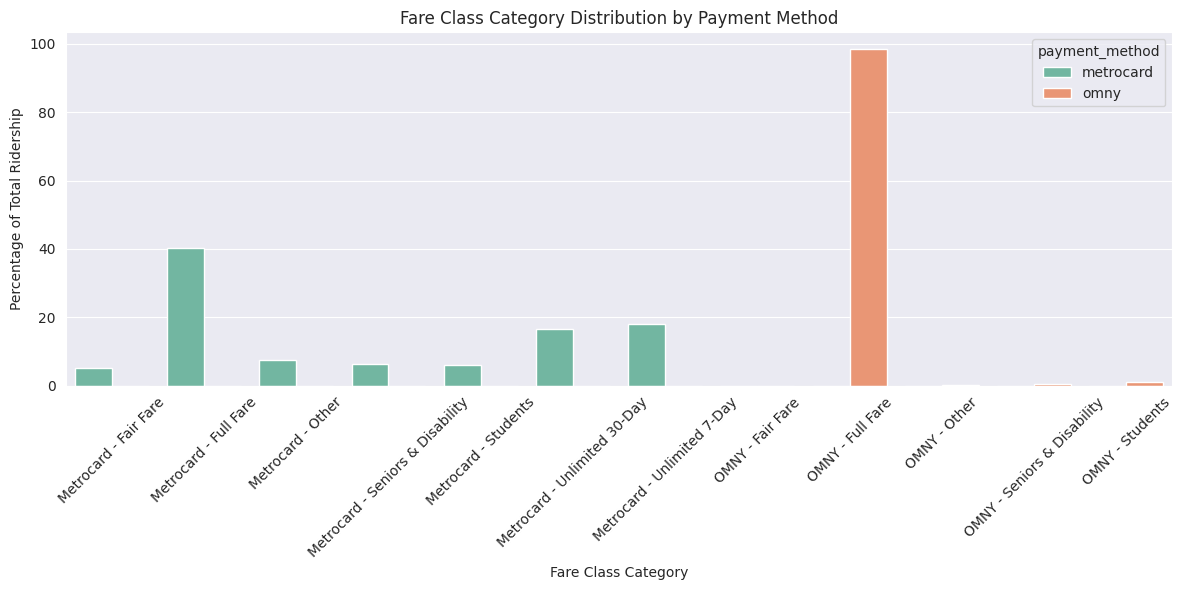

In [21]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=fare_dist, x='fare_class_category', y='percentage', hue='payment_method')
plt.title("Fare Class Category Distribution by Payment Method")
plt.xlabel("Fare Class Category")
plt.ylabel("Percentage of Total Ridership")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 How does fare class usage vary by borough?


<ipython-input-22-8b48ad3ec468>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_by_borough = df2.groupby(['borough', 'fare_class_category'])['ridership'].sum().reset_index()


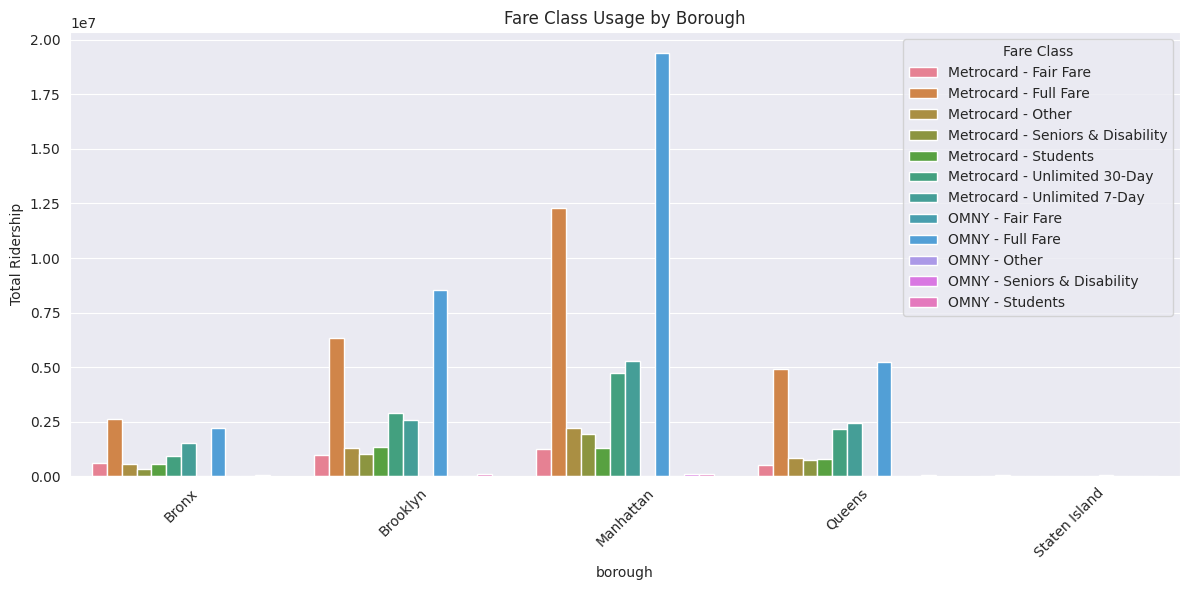

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and count fare class usage by borough
fare_by_borough = df2.groupby(['borough', 'fare_class_category'])['ridership'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fare_by_borough, x='borough', y='ridership', hue='fare_class_category')
plt.title('Fare Class Usage by Borough')
plt.ylabel('Total Ridership')
plt.xticks(rotation=45)
plt.legend(title='Fare Class')
plt.tight_layout()
plt.show()

In [23]:
#Staten Island Crushed Data
fare_by_borough[(fare_by_borough['borough'] == 'Staten Island') & (fare_by_borough['fare_class_category'].str.contains('OMNY'))]

,borough,fare_class_category,ridership
55,Staten Island,OMNY - Fair Fare,0.0
56,Staten Island,OMNY - Full Fare,40017.0
57,Staten Island,OMNY - Other,585.0
58,Staten Island,OMNY - Seniors & Disability,244.0
59,Staten Island,OMNY - Students,860.0


<ipython-input-24-b35d08e4da4b>:6: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension()


Column
    [0] Markdown(str)
    [1] Select(options=['Brooklyn', 'Queens', ...], value='Brooklyn')
    [2] ParamFunction(function, _pane=Matplotlib, defer_load=False)
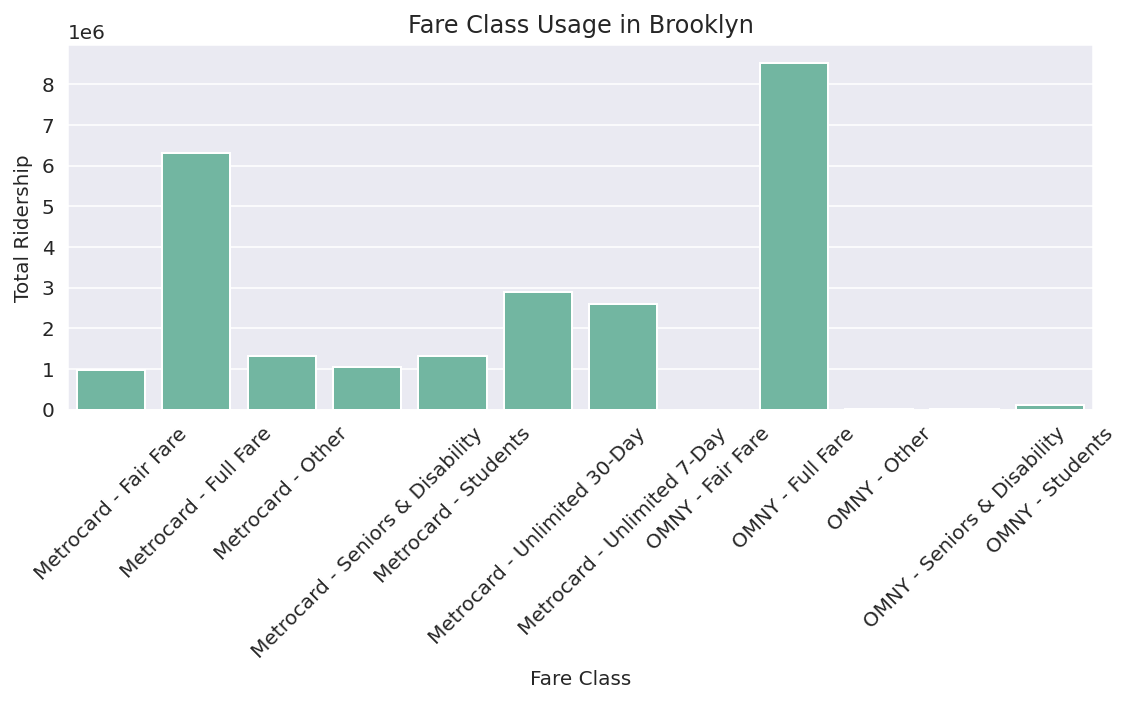

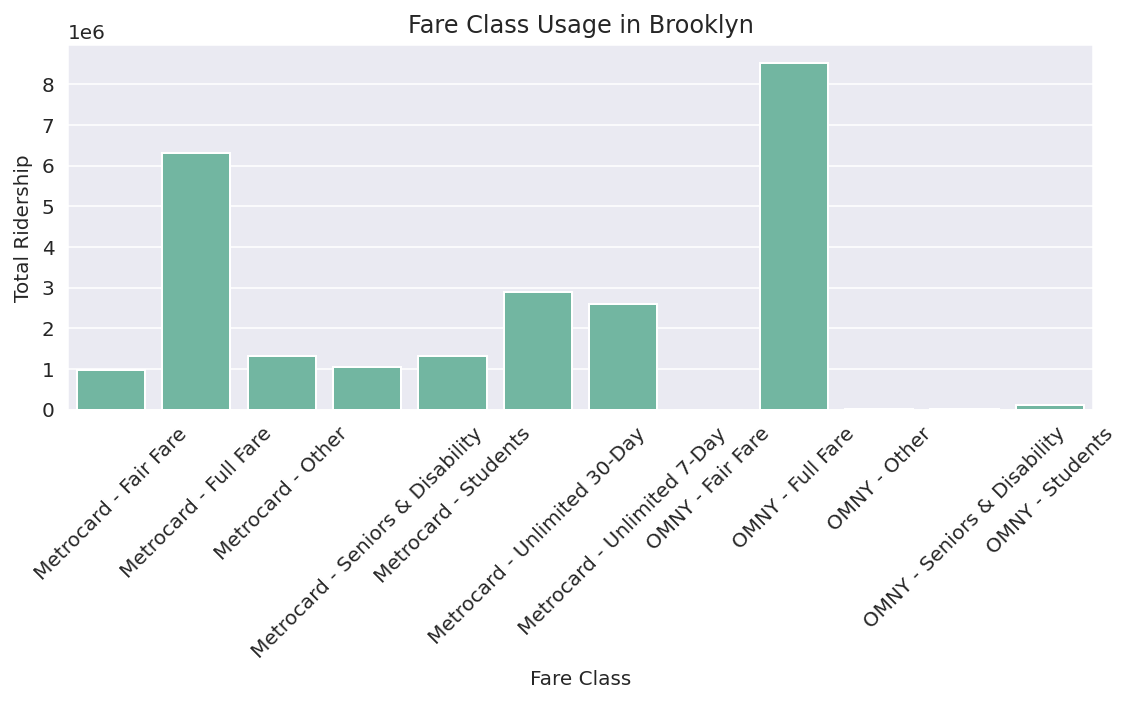

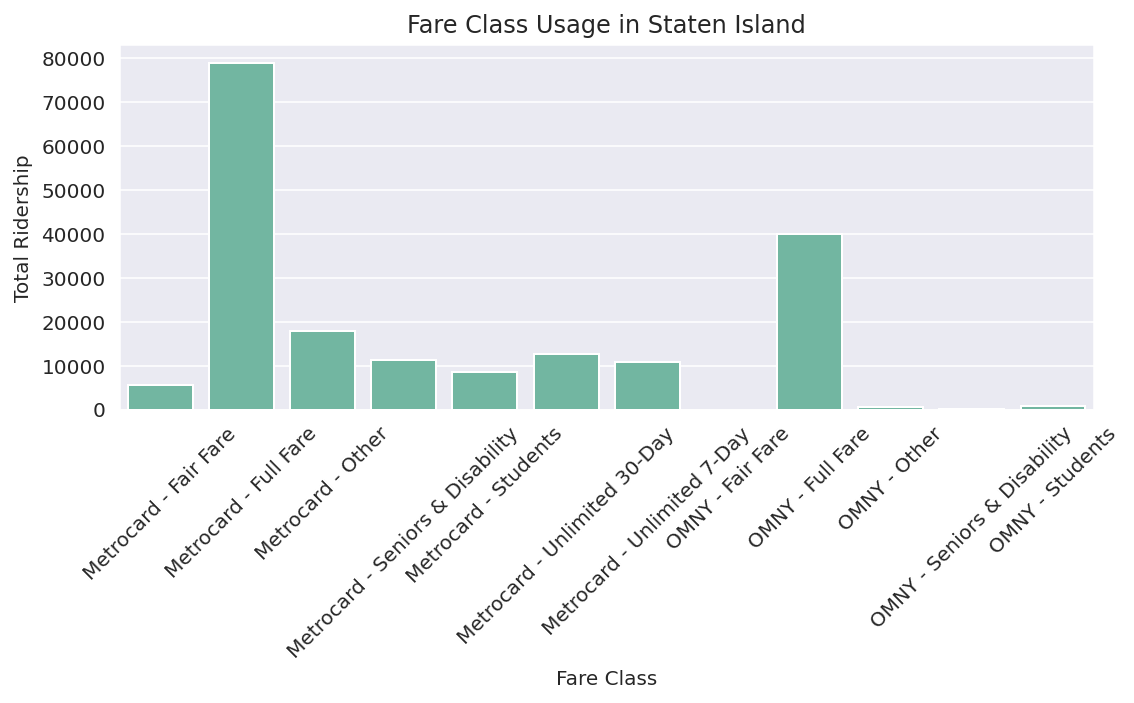

In [24]:
#Panel
import panel as pn
import matplotlib.pyplot as plt
import seaborn as sns

pn.extension()

# Unique boroughs
boroughs = df2['borough'].dropna().unique().tolist()

def plot_borough(selected_borough):
    filtered = df2[df2['borough'] == selected_borough]
    fare_by_borough = filtered.groupby('fare_class_category', observed=True)['ridership'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(data=fare_by_borough, x='fare_class_category', y='ridership', ax=ax)
    ax.set_title(f'Fare Class Usage in {selected_borough}')
    ax.set_ylabel('Total Ridership')
    ax.set_xlabel('Fare Class')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return pn.pane.Matplotlib(fig, tight=True)

borough_selector = pn.widgets.Select(name='Select Borough', options=boroughs)

dashboard = pn.Column(
    "# Interactive Fare Class Dashboard by Borough",
    borough_selector,
    pn.bind(plot_borough, selected_borough=borough_selector)
)

dashboard.servable()

In [25]:
# Save key dataframes as CSV
yearly_pivot.to_csv("yearly_ridership_by_payment_method.csv")
#monthly_usage.to_csv("monthly_usage.csv", index=False)
fare_dist.to_csv("fare_distribution.csv", index=False)
fare_by_borough.to_csv("fare_by_borough.csv", index=False)

In [26]:
# Convert pivoted to long format

# Load your original CSV
df3 = pd.read_csv("/content/yearly_ridership_by_payment_method.csv")

# Convert from wide to long format
df3_long = df3.melt(
    id_vars="year",                # Column to keep fixed
    var_name="payment_method",     # New column name for previous column headers
    value_name="ridership"         # New column name for values
)

# Save or view the result
df3_long.to_csv("yearly_ridership_by_payment_method_long.csv", index=False)
print(df3_long.head())

   year payment_method  ridership
0  2020      metrocard    6867230
1  2021      metrocard   15709646
2  2022      metrocard   16815262
3  2023      metrocard   14720003
4  2024      metrocard   11124299


In [27]:
import pandas as pd

# Load CSV files
yearly_long_clean = pd.read_csv("yearly_ridership_by_payment_method_long.csv")
fare_dist = pd.read_csv("fare_distribution.csv")
fare_by_borough = pd.read_csv("fare_by_borough.csv")

# Check available columns for safe merging
print("Yearly long columns:", yearly_long_clean.columns)
print("Fare distribution columns:", fare_dist.columns)
print("Fare by borough columns:", fare_by_borough.columns)

# Merge datasets
df4 = yearly_long_clean.merge(fare_dist, on="payment_method", how="left")
df4 = df4.merge(fare_by_borough, on="fare_class_category", how="left")

# Save the final combined table
df4.to_csv("/content/sample_data/combined_tableau_ready.csv", index=False)

print(" Combined file saved as combined_tableau_ready.csv")
print(df4.head())

Yearly long columns: Index(['year', 'payment_method', 'ridership'], dtype='object')
Fare distribution columns: Index(['fare_class_category', 'payment_method', 'ridership', 'percentage'], dtype='object')
Fare by borough columns: Index(['borough', 'fare_class_category', 'ridership'], dtype='object')
 Combined file saved as combined_tableau_ready.csv
   year payment_method  ridership_x    fare_class_category  ridership_y  \
0  2020      metrocard      6867230  Metrocard - Fair Fare    3387533.0   
1  2020      metrocard      6867230  Metrocard - Fair Fare    3387533.0   
2  2020      metrocard      6867230  Metrocard - Fair Fare    3387533.0   
3  2020      metrocard      6867230  Metrocard - Fair Fare    3387533.0   
4  2020      metrocard      6867230  Metrocard - Fair Fare    3387533.0   

   percentage        borough  ridership  
0    5.192701          Bronx   595484.0  
1    5.192701       Brooklyn   986678.0  
2    5.192701      Manhattan  1270180.0  
3    5.192701         Queens   